Задача 2. Из начального приближения x0 = (1, 1) решить задачу безусловной минимизации функции f: R^2 -> R, f(x) = x1^2 + e^(x2^2) методом Ньютона.

В результате работы программы выдать количество сделанных итераций, найденное решение и последовательность {xk} на каждой итерации. Сделать визуализацию решения задачи.

Для критериев остановки возьмем точность beta = 10^(-10)

 Шаг 0:
   x1=(0.0,0.6666666666666667)
 Шаг 1:
   x2=(0.0,0.3137254901960785)
 Шаг 2:
   x3=(0.0,0.05159892418258666)
 Шаг 3:
   x4=(0.0,0.0002733036915201631)
 Шаг 4:
   x5=(0.0,4.082878197857187e-11)

По критерию остановки: ||f'(x^k)|| <= beta -> 8.165756395714374e-11 <= 10^(-10)  решение найдено 
 Последний шаг: 4 
 Решение: x5=(0.0,4.082878197857187e-11)


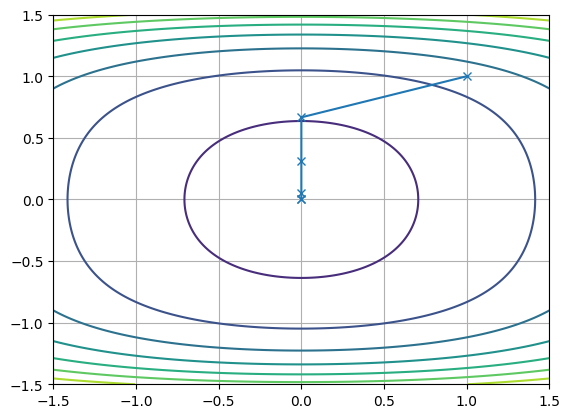

In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

x1, x2 = sp.symbols("x1 x2")
f = x1**2 + sp.E**(x2**2)
f_sym = sp.lambdify((x1, x2), f, "numpy")
df_sym = sp.lambdify((x1, x2), sp.derive_by_array(f, [x1, x2]), "numpy")
d2f_sym = sp.lambdify((x1, x2), sp.derive_by_array(sp.derive_by_array(f, [x1, x2]), [x1, x2]), "numpy")
beta = 10**(-10)

x = np.array([[1, 1]])

for k in range(0,100):
    
    x = np.append(x, [x[k] - np.linalg.inv(d2f_sym(*x[k])).dot(df_sym(*x[k]))], axis=0)

    print(f" Шаг {k}:\n   x_{k+1}=({x[k+1][0]},{x[k+1][1]})")
    
    if np.linalg.norm(x[k+1] - x[k]) <= beta:
        print(f"\nПо критерию остановки: ||x_k+1 - x_k|| <= beta -> {np.linalg.norm(x[k+1] - x[k])} <= 10^(-10)  решение найдено \n Последний шаг: {k} \n Решение: x_{k+1}=({x[k+1][0]},{x[k+1][1]})")
        break
    if abs(f_sym(*x[k+1])-f_sym(*x[k])) <= beta:
        print(f"\nПо критерию остановки: |f(x_k+1) - f(x_k)| <= beta -> {abs(f_sym(*x[k+1])-f_sym(*x[k]))} <= 10^(-10) решение найдено \n Последний шаг: {k} \n Решение: x_{k+1}=({x[k+1][0]},{x[k+1][1]})")
        break
    if np.linalg.norm(df_sym(*x[k+1])) <= beta:
        print(f"\nПо критерию остановки: ||f'(x_k)|| <= beta -> {np.linalg.norm(df_sym(*x[k+1]))} <= 10^(-10)  решение найдено \n Последний шаг: {k} \n Решение: x_{k+1}=({x[k+1][0]},{x[k+1][1]})")
        break

if k==99:
    print(f"Остановка по количеству итераций: 100 \n Последнее решение: x{k+1} = ({x[k+1][0]},{x[k+1][1]})")
    
# Рисуем
space = np.linspace(-1.5, 1.5, 1000)
x1, x2 = np.meshgrid(space, space)

plt.contour(x1, x2, f_sym(x1, x2))
plt.plot(x.T[0], x.T[1], marker='x')
plt.grid()